# Exercice 3: Mécanisme Self-Attention - Calcul des Word Embeddings

 1)  Utilisation d'embeddings Word2Vec

Utiliser  Word2Vec pour créer des embeddings sémantiques.

Word2Vec capture les relations sémantiques entre les mots en les représentant dans un espace vectoriel dense.

    - tokeniser une  phrase
    - créer les embeddings avec Word2Vec
    - calculer les matrices Query, Key et Value pour appliquer le mécanisme d'attention.


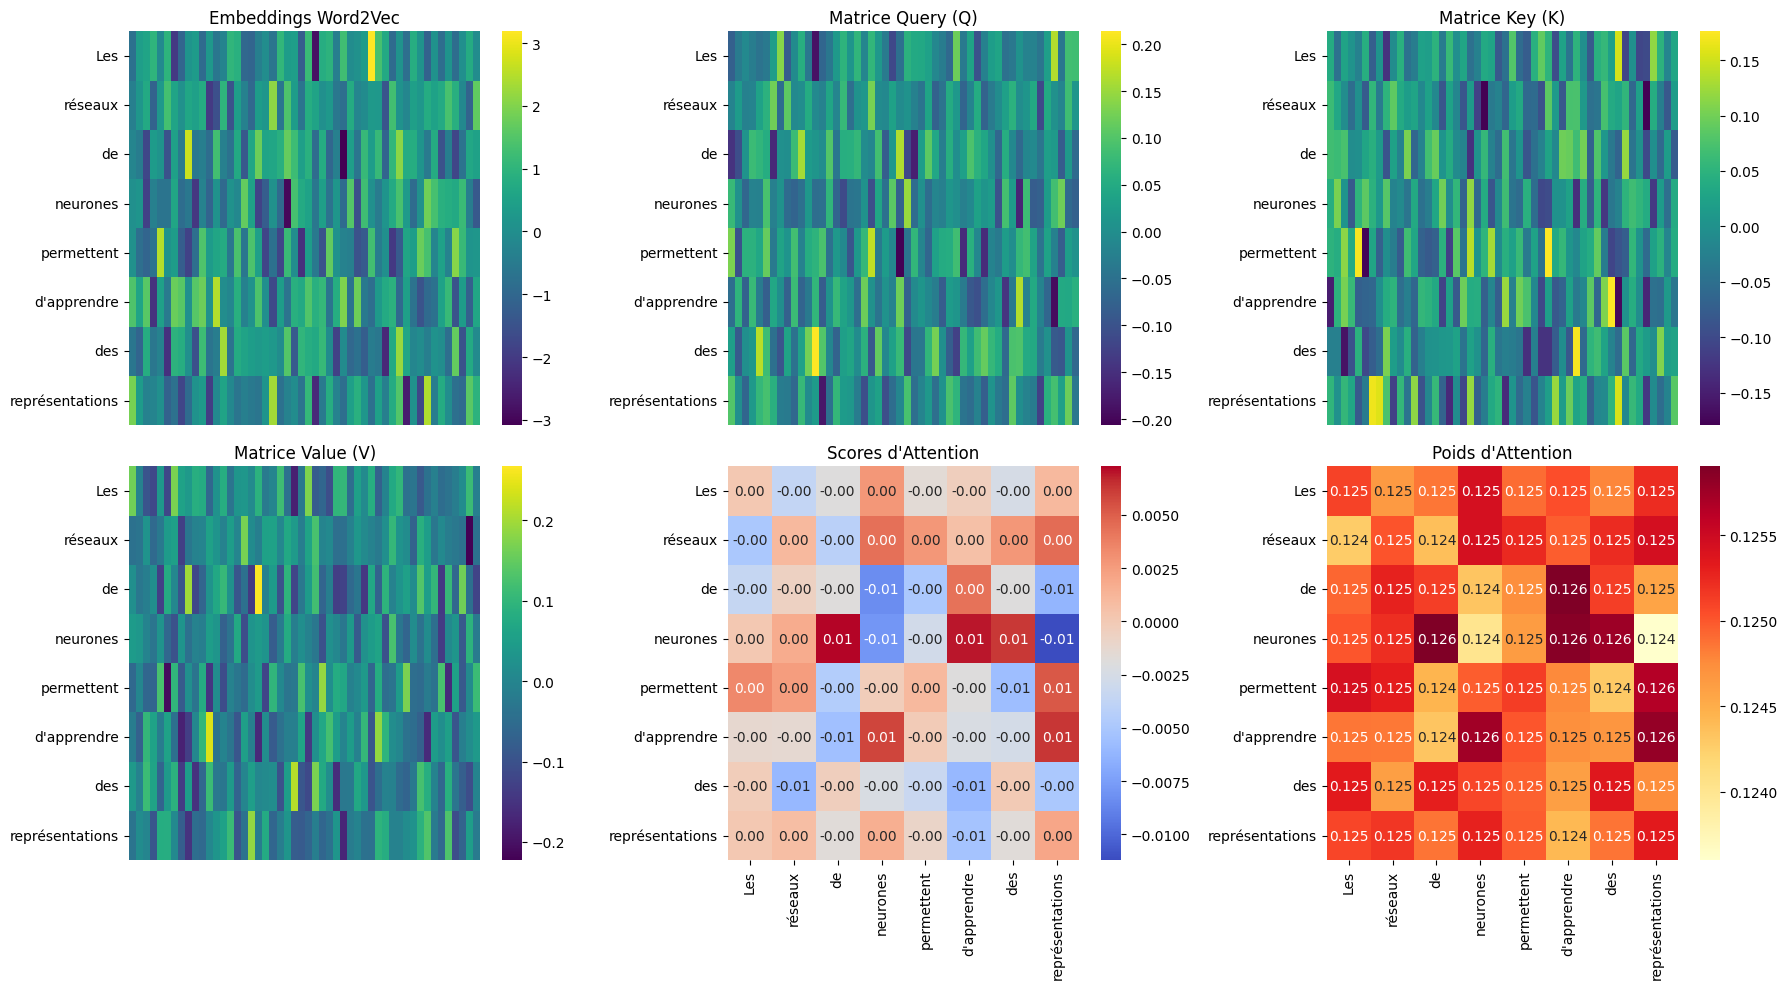

Phrase: ['Les', 'réseaux', 'de', 'neurones', 'permettent', "d'apprendre", 'des', 'représentations']

Dimension des embeddings: 50

Scores d'attention:
 [[ 9.83069666e-05 -3.62767177e-03 -1.90446663e-03  2.75078923e-03
  -1.56520161e-03 -4.48711651e-04 -2.53514900e-03  1.02464502e-03]
 [-4.95603038e-03  1.03623837e-03 -4.18130777e-03  4.37917645e-03
   2.77912148e-03  6.27574763e-04  2.77405948e-03  4.48950867e-03]
 [-3.49738321e-03 -5.99044659e-04 -1.86858559e-03 -8.33695201e-03
  -4.98843347e-03  4.29531849e-03 -1.89383841e-03 -6.27566830e-03]
 [ 1.22425984e-04  1.75335497e-03  7.27571152e-03 -7.91531142e-03
  -2.80455539e-03  6.94781480e-03  6.19790084e-03 -1.12058990e-02]
 [ 3.42536099e-03  2.48147102e-03 -4.50750577e-03 -2.54156091e-04
   1.05403524e-03 -1.92676617e-03 -5.67645953e-03  5.19181799e-03]
 [-1.31350234e-03 -1.34282302e-03 -5.52464856e-03  5.84692967e-03
  -9.55483822e-05 -2.29009866e-03 -2.62711102e-03  6.27724932e-03]
 [-2.92047980e-04 -6.03656027e-03 -4.44272279e-04 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

phrase = "Les réseaux de neurones permettent d'apprendre des représentations".split()

corpus_entrainement = [
    "Les réseaux neuronaux sont puissants".split(),
    "Le machine learning utilise des données".split(),
    "apprendre des représentations est essentiel".split(),
    "Les données alimentent l'intelligence artificielle".split(),
    "Transformer permet de capturer les relations entre mots".split()
]



modele_w2v = Word2Vec(sentences=phrases_entrainement, 
                      vector_size=50, 
                      window=3, 
                      min_count=1, 
                      seed=42)

embeddings = np.array([modele_w2v.wv[mot] if mot in modele_w2v.wv 
                       else np.random.randn(50) 
                       for mot in phrase])

dim_modele = embeddings.shape[1]

np.random.seed(42)
Wq = np.random.randn(dim_modele, dim_modele) * 0.01
Wk = np.random.randn(dim_modele, dim_modele) * 0.01
Wv = np.random.randn(dim_modele, dim_modele) * 0.01

Q = np.dot(embeddings, Wq)
K = np.dot(embeddings, Wk)
V = np.dot(embeddings, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
poids_attention = softmax(scores)
sortie_attention = np.dot(poids_attention, V)

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.heatmap(embeddings, cmap='viridis', xticklabels=False, yticklabels=phrase)
plt.title('Embeddings Word2Vec')

plt.subplot(2, 3, 2)
sns.heatmap(Q, cmap='viridis', xticklabels=False, yticklabels=phrase)
plt.title('Matrice Query (Q)')

plt.subplot(2, 3, 3)
sns.heatmap(K, cmap='viridis', xticklabels=False, yticklabels=phrase)
plt.title('Matrice Key (K)')

plt.subplot(2, 3, 4)
sns.heatmap(V, cmap='viridis', xticklabels=False, yticklabels=phrase)
plt.title('Matrice Value (V)')

plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=phrase, yticklabels=phrase)
plt.title('Scores d\'Attention')

plt.subplot(2, 3, 6)
sns.heatmap(poids_attention, annot=True, fmt='.3f', cmap='YlOrRd', 
            xticklabels=phrase, yticklabels=phrase)
plt.title('Poids d\'Attention')

plt.tight_layout()
plt.show()

print("Phrase:", phrase)
print("\nDimension des embeddings:", dim_modele)
print("\nScores d'attention:\n", scores)
print("\nPoids d'attention:\n", poids_attention)
print("\nSortie d'attention:\n", sortie_attention)

* Embeddings Word2Vec :
Les embeddings Word2Vec créent des représentations vectorielles denses de 50 dimensions où les mots sémantiquement similaires sont proches dans l'espace vectoriel. 
Par exemple, "réseaux" et "neurones" devraient avoir des embeddings relativement proches car ils apparaissent souvent dans des contextes similaires.

* Les matrices Q/K/V permettent de transformer ces embeddings pour le mécanisme d’attention.
* Les scores d'attention varient entre environ -0.018 et +0.012,

Les valeurs proches de 0 (en blanc/orange) indiquent une faible similarité

Les valeurs positives (rouge) indiquent que les mots ont une relation forte

Les valeurs négatives (bleu) indiquent une dissimilarité

Les  scores sont relativement équilibré

Les petites valeurs dans Q, K, V nécessitent une bonne initialisation des poids


2) Initialisation Xavier des poids


L'initialisation Xavier est conçue pour maintenir la variance des activations constante à travers les couches.

Elle initialise les poids selon une distribution uniforme basée sur le nombre de neurones en entrée et en sortie.



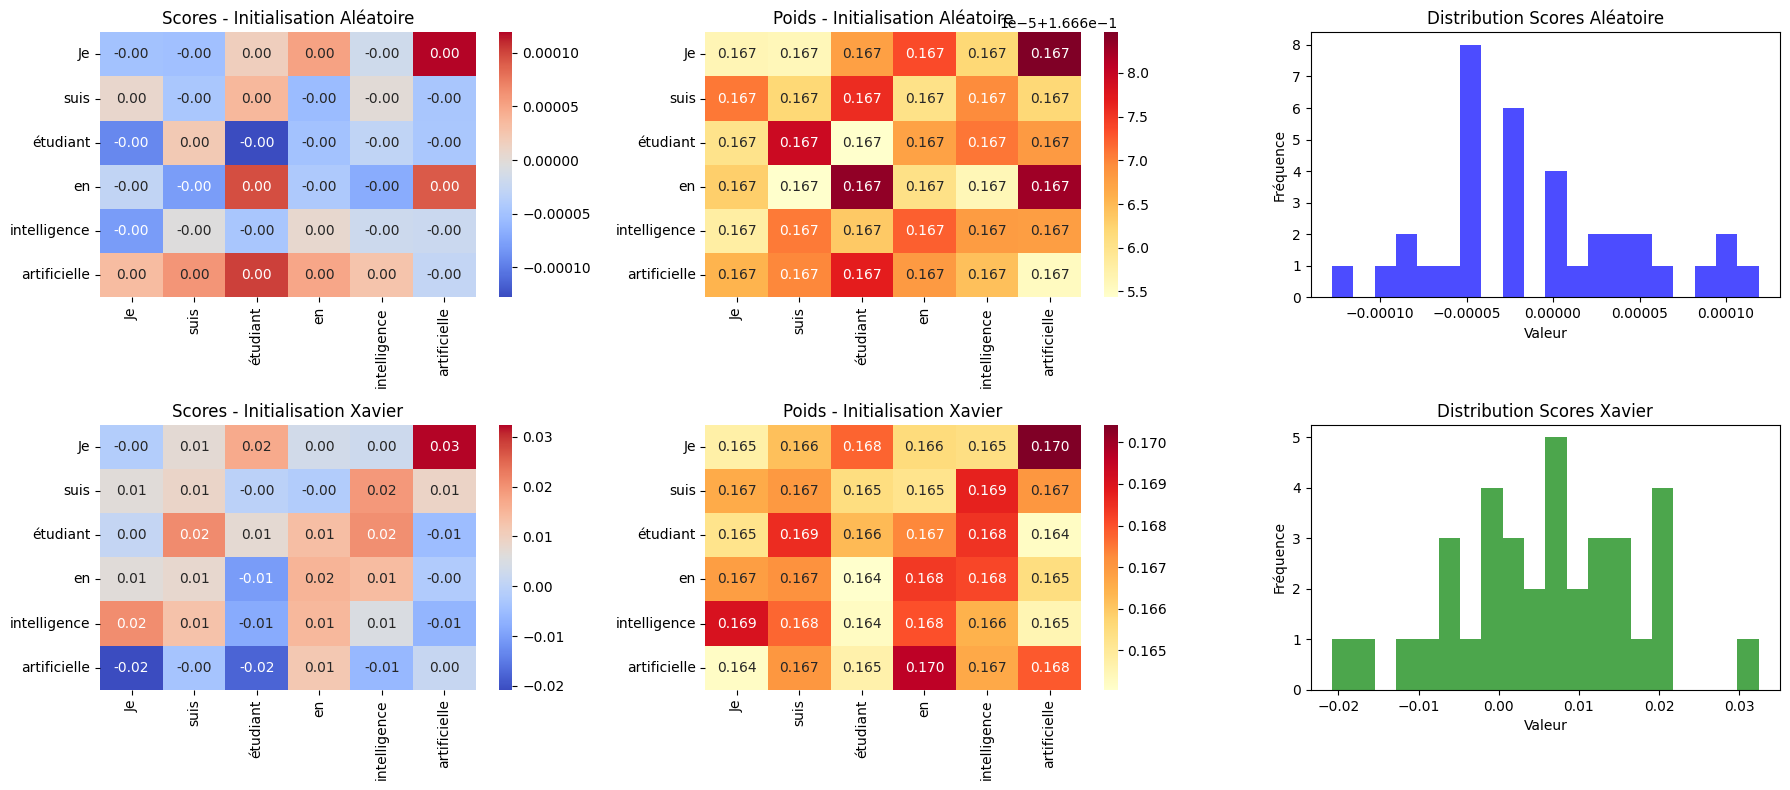

Écart-type scores aléatoire: 5.74705092458195e-05
Écart-type scores Xavier: 0.011267715883139792

Variance poids aléatoire: 6.718306834282594e-11
Variance poids Xavier: 2.744595012252066e-06


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def initialisation_xavier(taille_entree, taille_sortie):
    limite = np.sqrt(6.0 / (taille_entree + taille_sortie))
    return np.random.uniform(-limite, limite, (taille_entree, taille_sortie))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

phrase = "Je suis étudiant en intelligence artificielle".split()
dim_modele = 50

embeddings = np.random.randn(len(phrase), dim_modele) * 0.1

np.random.seed(42)
Wq_random = np.random.randn(dim_modele, dim_modele) * 0.01
Wk_random = np.random.randn(dim_modele, dim_modele) * 0.01
Wv_random = np.random.randn(dim_modele, dim_modele) * 0.01

Wq_xavier = initialisation_xavier(dim_modele, dim_modele)
Wk_xavier = initialisation_xavier(dim_modele, dim_modele)
Wv_xavier = initialisation_xavier(dim_modele, dim_modele)

Q_random = np.dot(embeddings, Wq_random)
K_random = np.dot(embeddings, Wk_random)
V_random = np.dot(embeddings, Wv_random)
scores_random = np.dot(Q_random, K_random.T) / np.sqrt(K_random.shape[1])
poids_random = softmax(scores_random)

Q_xavier = np.dot(embeddings, Wq_xavier)
K_xavier = np.dot(embeddings, Wk_xavier)
V_xavier = np.dot(embeddings, Wv_xavier)
scores_xavier = np.dot(Q_xavier, K_xavier.T) / np.sqrt(K_xavier.shape[1])
poids_xavier = softmax(scores_xavier)

plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1)
sns.heatmap(scores_random, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=phrase, yticklabels=phrase)
plt.title('Scores - Initialisation Aléatoire')

plt.subplot(2, 3, 2)
sns.heatmap(poids_random, annot=True, fmt='.3f', cmap='YlOrRd',
            xticklabels=phrase, yticklabels=phrase)
plt.title('Poids - Initialisation Aléatoire')

plt.subplot(2, 3, 3)
plt.hist(scores_random.flatten(), bins=20, alpha=0.7, color='blue')
plt.title('Distribution Scores Aléatoire')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

plt.subplot(2, 3, 4)
sns.heatmap(scores_xavier, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=phrase, yticklabels=phrase)
plt.title('Scores - Initialisation Xavier')

plt.subplot(2, 3, 5)
sns.heatmap(poids_xavier, annot=True, fmt='.3f', cmap='YlOrRd',
            xticklabels=phrase, yticklabels=phrase)
plt.title('Poids - Initialisation Xavier')

plt.subplot(2, 3, 6)
plt.hist(scores_xavier.flatten(), bins=20, alpha=0.7, color='green')
plt.title('Distribution Scores Xavier')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

print("Écart-type scores aléatoire:", np.std(scores_random))
print("Écart-type scores Xavier:", np.std(scores_xavier))
print("\nVariance poids aléatoire:", np.var(poids_random))
print("Variance poids Xavier:", np.var(poids_xavier))


* Avec l’initialisation aléatoire, les scores d’attention sont extrêmement proches de zéro et les poids d’attention sont presque identiques pour tous les mots.

    L’attention est donc uniforme => le modèle ne sait pas encore sur quels mots se concentrer, ce qui limite son apprentissage.

* Pour l’initialisation Xavier, les scores sont plus variés et les poids d’attention commencent à se différencier. Cela indique que certains mots commencent à recevoir plus d’attention que d’autres.

    => Xavier permet de préserver la variance, et donne une meilleure convergence lors de l’entraînement.

3) Encodage positionnel


Le mécanisme self-attention ne capture pas naturellement l'ordre des mots. 

L'encodage positionnel résout ce problème en ajoutant des informations sur la position de chaque mot.

 l'encodage positionnel utilisé est sinusoïdal. Cette approche permet au modèle d'apprendre facilement à faire attention aux positions relatives


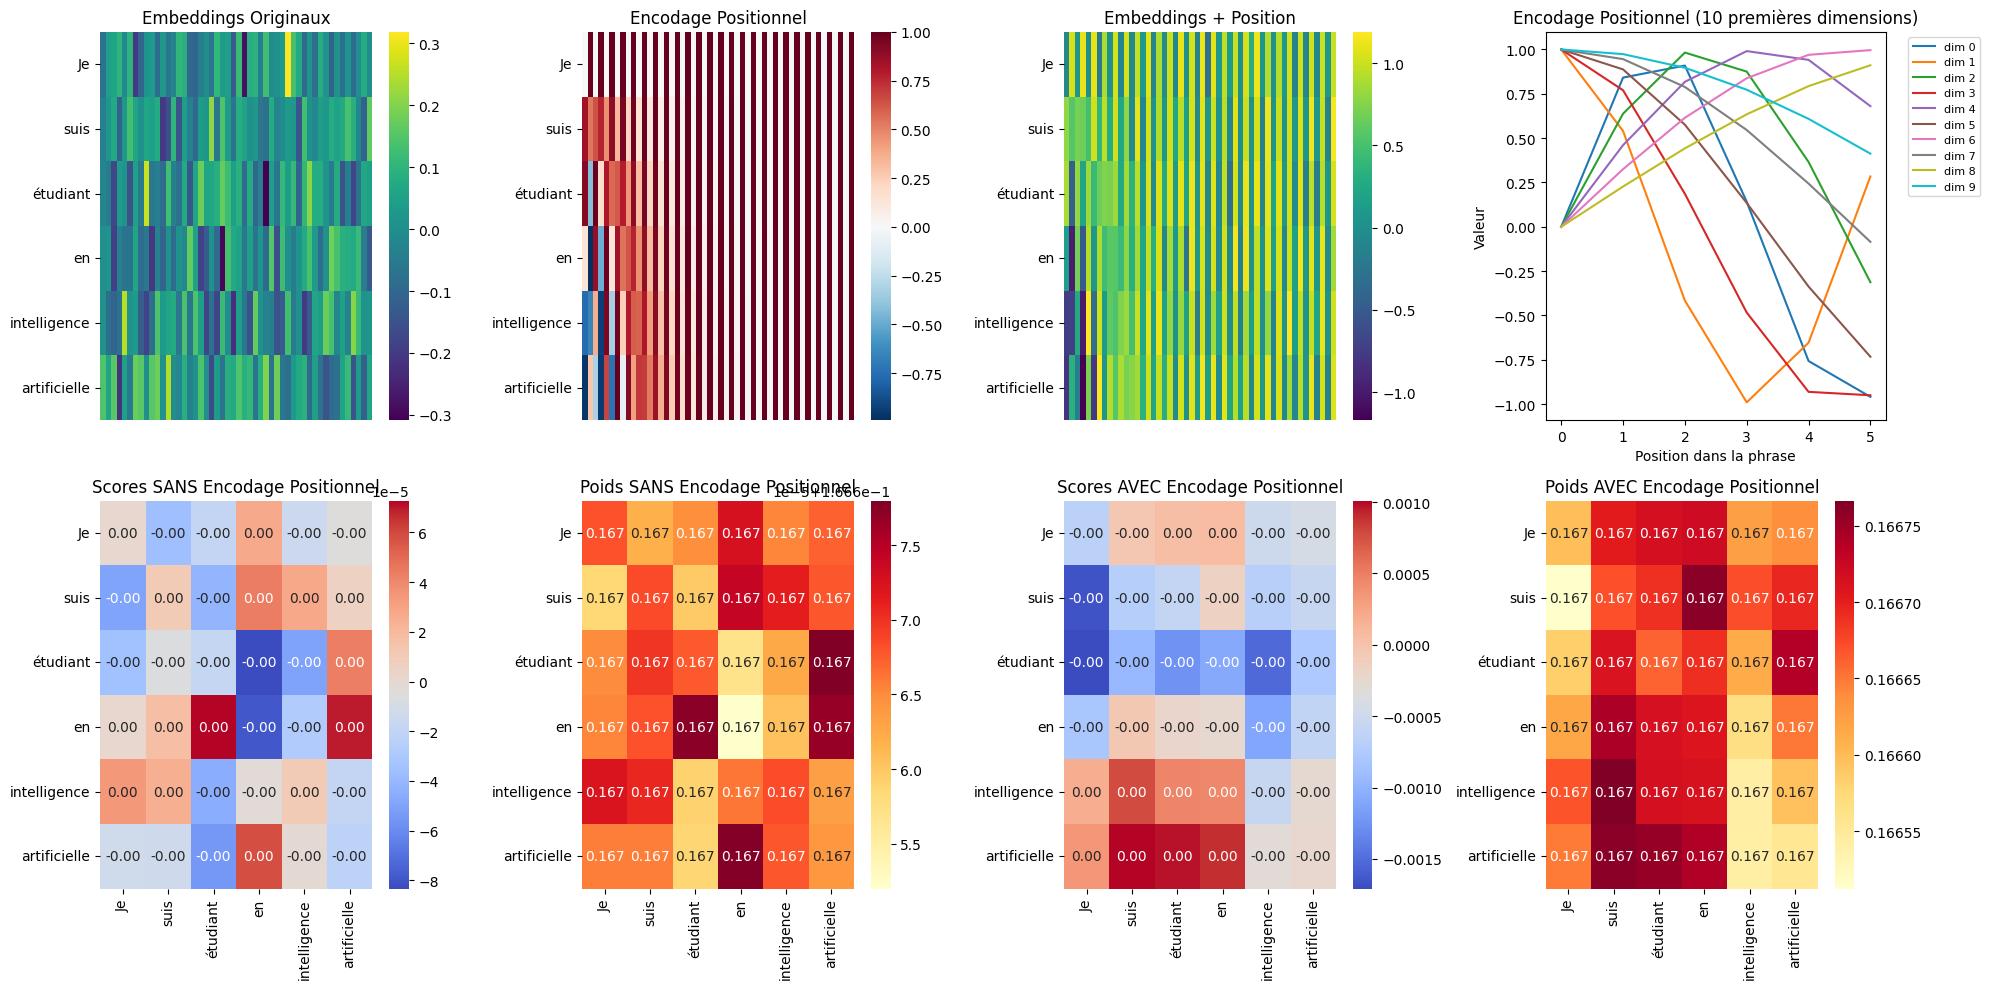

Phrase: ['Je', 'suis', 'étudiant', 'en', 'intelligence', 'artificielle']

Différence moyenne des poids d'attention: 5.801949152353427e-05

Rôle de l'encodage positionnel:
- Permet au modèle de distinguer les positions des mots
- Ajoute l'information séquentielle aux embeddings
- Utilise des fréquences sinusoïdales pour encoder la position
- Essentiel pour capturer l'ordre dans la phrase
- Permet d'extrapoler à des longueurs de séquence non vues


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def encodage_positionnel(longueur_seq, dim_modele):
    encodage = np.zeros((longueur_seq, dim_modele))
    position = np.arange(longueur_seq).reshape(-1, 1)
    div_term = np.exp(np.arange(0, dim_modele, 2) * 
                      -(np.log(10000.0) / dim_modele))
    
    encodage[:, 0::2] = np.sin(position * div_term)
    encodage[:, 1::2] = np.cos(position * div_term)
    
    return encodage

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

phrase = "Je suis étudiant en intelligence artificielle".split()
dim_modele = 50
longueur_seq = len(phrase)

embeddings = np.random.randn(longueur_seq, dim_modele) * 0.1
pos_encoding = encodage_positionnel(longueur_seq, dim_modele)
embeddings_avec_pos = embeddings + pos_encoding

np.random.seed(42)
Wq = np.random.randn(dim_modele, dim_modele) * 0.01
Wk = np.random.randn(dim_modele, dim_modele) * 0.01
Wv = np.random.randn(dim_modele, dim_modele) * 0.01

Q_sans = np.dot(embeddings, Wq)
K_sans = np.dot(embeddings, Wk)
V_sans = np.dot(embeddings, Wv)
scores_sans = np.dot(Q_sans, K_sans.T) / np.sqrt(K_sans.shape[1])
poids_sans = softmax(scores_sans)

Q_avec = np.dot(embeddings_avec_pos, Wq)
K_avec = np.dot(embeddings_avec_pos, Wk)
V_avec = np.dot(embeddings_avec_pos, Wv)
scores_avec = np.dot(Q_avec, K_avec.T) / np.sqrt(K_avec.shape[1])
poids_avec = softmax(scores_avec)

plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
sns.heatmap(embeddings, cmap='viridis', xticklabels=False, yticklabels=phrase)
plt.title('Embeddings Originaux')

plt.subplot(2, 4, 2)
sns.heatmap(pos_encoding, cmap='RdBu_r', xticklabels=False, yticklabels=phrase)
plt.title('Encodage Positionnel')

plt.subplot(2, 4, 3)
sns.heatmap(embeddings_avec_pos, cmap='viridis', 
            xticklabels=False, yticklabels=phrase)
plt.title('Embeddings + Position')

plt.subplot(2, 4, 4)
plt.plot(pos_encoding[:, :10])
plt.title('Encodage Positionnel (10 premières dimensions)')
plt.xlabel('Position dans la phrase')
plt.ylabel('Valeur')
plt.legend([f'dim {i}' for i in range(10)], 
           bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.subplot(2, 4, 5)
sns.heatmap(scores_sans, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=phrase, yticklabels=phrase)
plt.title('Scores SANS Encodage Positionnel')

plt.subplot(2, 4, 6)
sns.heatmap(poids_sans, annot=True, fmt='.3f', cmap='YlOrRd',
            xticklabels=phrase, yticklabels=phrase)
plt.title('Poids SANS Encodage Positionnel')

plt.subplot(2, 4, 7)
sns.heatmap(scores_avec, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=phrase, yticklabels=phrase)
plt.title('Scores AVEC Encodage Positionnel')

plt.subplot(2, 4, 8)
sns.heatmap(poids_avec, annot=True, fmt='.3f', cmap='YlOrRd',
            xticklabels=phrase, yticklabels=phrase)
plt.title('Poids AVEC Encodage Positionnel')

plt.tight_layout()
plt.show()



* Les embeddings Word2Vec ne contiennent que l’information sémantique des mots.

* L’encodage positionnel ajoute un motif périodique aux embeddings pour indiquer à quel endroit chaque mot apparaît dans la phrase.

    => en asemblant les deux nous aurons la signification des mots et leur position dans la phrase.

* L’ajout de l’encodage positionnel modifie les scores et poids d’attention car même si les variations sont petites, l’attention n’est plus totalement uniforme.